In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = 16, 10
sns.set(style="darkgrid")

In [41]:
df = pd.read_csv('data/train.csv')

In [42]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
y = df['SalePrice']
x = df.drop(columns=['SalePrice'])
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

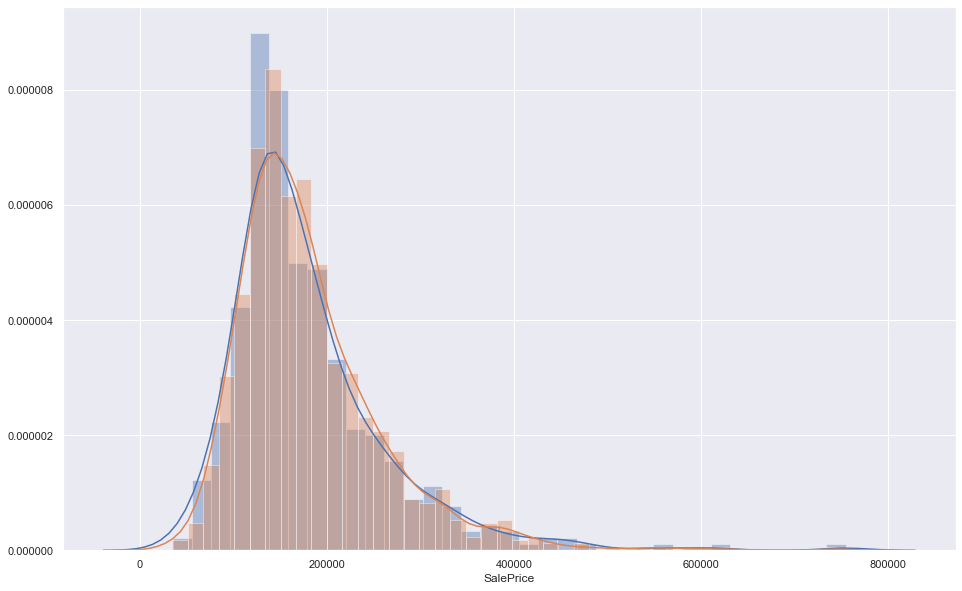

In [45]:
sns.distplot(y_test)
sns.distplot(y_train)

In [48]:
numeric_cols = x_train.select_dtypes([np.number])
numeric_mean = np.mean(numeric_cols)
numeric_features = numeric_cols.columns

numeric_cols.fillna(numeric_mean, inplace=True)
pearson = {feature: np.corrcoef(numeric_cols[feature], y)[0][1] for feature in numeric_features}
sort_num = sorted(pearson.items(), key=lambda x: x[1], reverse=True)
features_num = [x[0] for x in sort_num]
values_num = [x[1] for x in sort_num]

/Users/mshagga/.brew/lib/python3.7/site-packages/pandas/core/generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


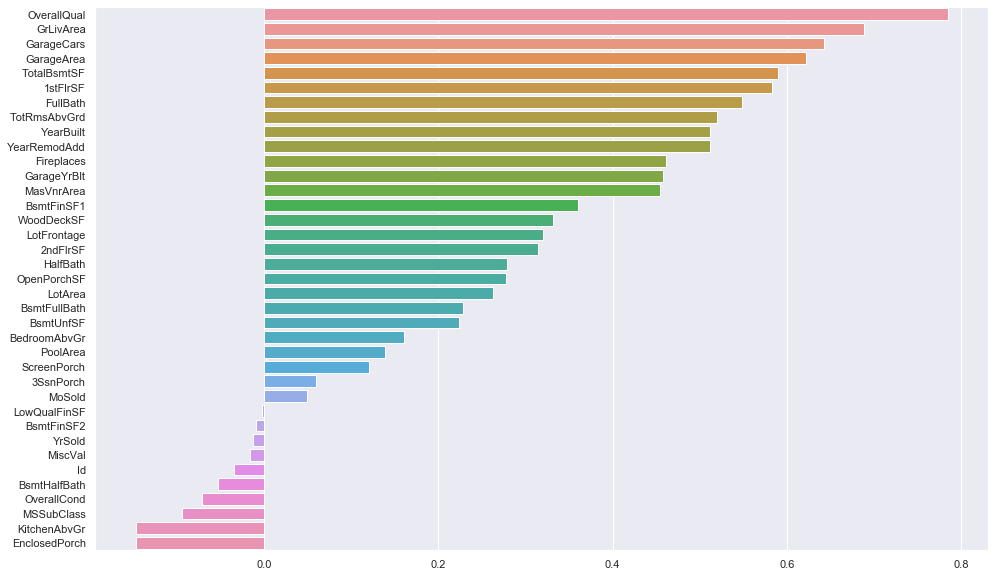

In [49]:
sns.barplot(x=values_num, y=features_num)

In [52]:
x_train.fillna(value=numeric_mean)
x_test.fillna(value=numeric_mean)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 135 to 1126
Data columns (total 80 columns):
Id               1022 non-null int64
MSSubClass       1022 non-null int64
MSZoning         1022 non-null object
LotFrontage      832 non-null float64
LotArea          1022 non-null int64
Street           1022 non-null object
Alley            66 non-null object
LotShape         1022 non-null object
LandContour      1022 non-null object
Utilities        1022 non-null object
LotConfig        1022 non-null object
LandSlope        1022 non-null object
Neighborhood     1022 non-null object
Condition1       1022 non-null object
Condition2       1022 non-null object
BldgType         1022 non-null object
HouseStyle       1022 non-null object
OverallQual      1022 non-null int64
OverallCond      1022 non-null int64
YearBuilt        1022 non-null int64
YearRemodAdd     1022 non-null int64
RoofStyle        1022 non-null object
RoofMatl         1022 non-null object
Exterior1st      1022 non-

In [60]:
sort_num[:3]

[('OverallQual', 0.7847199696514474),
 ('GrLivArea', 0.6892376059288237),
 ('GarageCars', 0.6426887093726482)]

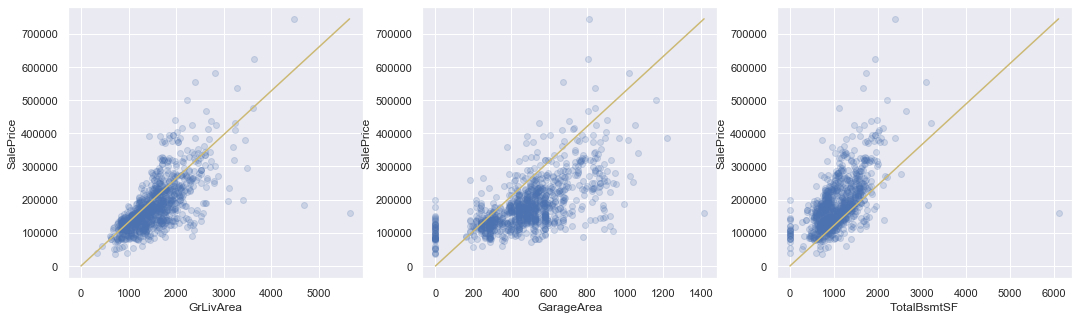

In [69]:
fig, axes = plt.subplots(figsize=(18,5), ncols=3)
for i, features in enumerate(['GrLivArea', 'GarageArea', 'TotalBsmtSF']):
    axes[i].scatter(x_train[features], y_train, alpha=.2)
    axes[i].plot([0, np.max(x_train[features])], [0, np.max(y_train)], c='y')
    axes[i].set_xlabel(features)
    axes[i].set_ylabel('SalePrice')

In [84]:
x_train.fillna(numeric_mean, inplace=True)
x_test.fillna(numeric_mean, inplace=True)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 892 to 798
Data columns (total 80 columns):
Id               438 non-null int64
MSSubClass       438 non-null int64
MSZoning         438 non-null object
LotFrontage      438 non-null float64
LotArea          438 non-null int64
Street           438 non-null object
Alley            25 non-null object
LotShape         438 non-null object
LandContour      438 non-null object
Utilities        438 non-null object
LotConfig        438 non-null object
LandSlope        438 non-null object
Neighborhood     438 non-null object
Condition1       438 non-null object
Condition2       438 non-null object
BldgType         438 non-null object
HouseStyle       438 non-null object
OverallQual      438 non-null int64
OverallCond      438 non-null int64
YearBuilt        438 non-null int64
YearRemodAdd     438 non-null int64
RoofStyle        438 non-null object
RoofMatl         438 non-null object
Exterior1st      438 non-null object
Exterior2nd 

/Users/mshagga/.brew/lib/python3.7/site-packages/pandas/core/generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [89]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

lin_reg = Ridge(random_state=42)
lin_reg.fit(x_train[numeric_features], y_train)
y_pred = lin_reg.predict(x_test[numeric_features])
y_train_pred = lin_reg.predict(x_train[numeric_features])

print('Test MSE = {0}\nTrain MSE = {1}'.format(mean_squared_error(y_test, y_pred), mean_squared_error(y_train, y_train_pred)))

Test MSE = 1243976286.6303048
Train MSE = 1194398625.32114


In [94]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(lin_reg, x_train[numeric_features], y_train, cv=10, scoring="neg_mean_squared_error")
cv_score

array([-2.38461903e+09, -8.45537304e+08, -2.18110825e+09, -5.10665534e+09,
       -1.45018847e+09, -7.65813452e+08, -7.10542880e+08, -7.36140815e+08,
       -7.27478525e+08, -8.32288906e+08])

In [96]:
-np.mean(cv_score)

1574037297.8631167

In [97]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred)**2
    return (np.sqrt(np.mean(error)))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [100]:
x_train['LotArea'].std()

11329.753422670045